In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from KNearestNeighbors import *
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Importando Dados

In [2]:
data = pd.read_csv('./kc2.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## K Nearest Neighbors

### Treinando o modelo

In [22]:
folder = KFold(n_splits=10, shuffle=True)
normalizer = StandardScaler()
euc_1_model = KNearestNeighbors(1, 'euclidean')
euc_5_model = KNearestNeighbors(5, 'euclidean')
mah_1_model = KNearestNeighbors(1, 'mahalanobis')
mah_5_model = KNearestNeighbors(5, 'mahalanobis')

metrics = np.zeros((4, 10, 4))

for i, (train_index, test_index) in enumerate(folder.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train = normalizer.fit_transform(X_train)
    X_test = normalizer.transform(X_test)
    
    euc_1_model.fit(X_train, y_train)
    euc_5_model.fit(X_train, y_train)
    mah_1_model.fit(X_train, y_train)
    mah_5_model.fit(X_train, y_train)
    
    euc_1_pred = euc_1_model.pred(X_test)
    euc_5_pred = euc_5_model.pred(X_test)
    mah_1_pred = mah_1_model.pred(X_test)
    mah_5_pred = mah_5_model.pred(X_test)
    
    metrics[0][i] = np.array([accuracy_score(y_test, euc_1_pred),
                              recall_score(y_test, euc_1_pred, zero_division=0),
                              precision_score(y_test, euc_1_pred),
                              f1_score(y_test, euc_1_pred)])
    
    metrics[1][i] = np.array([accuracy_score(y_test, euc_5_pred),
                              recall_score(y_test, euc_5_pred, zero_division=0),
                              precision_score(y_test, euc_5_pred),
                              f1_score(y_test, euc_5_pred)])
    
    metrics[2][i] = np.array([accuracy_score(y_test, mah_1_pred),
                              recall_score(y_test, mah_1_pred, zero_division=0),
                              precision_score(y_test, mah_1_pred),
                              f1_score(y_test, mah_1_pred)])
    
    metrics[3][i] = np.array([accuracy_score(y_test, mah_5_pred),
                              recall_score(y_test, mah_5_pred, zero_division=0),
                              precision_score(y_test, mah_5_pred),
                              f1_score(y_test, mah_5_pred)])
    

### Plotando as medidas

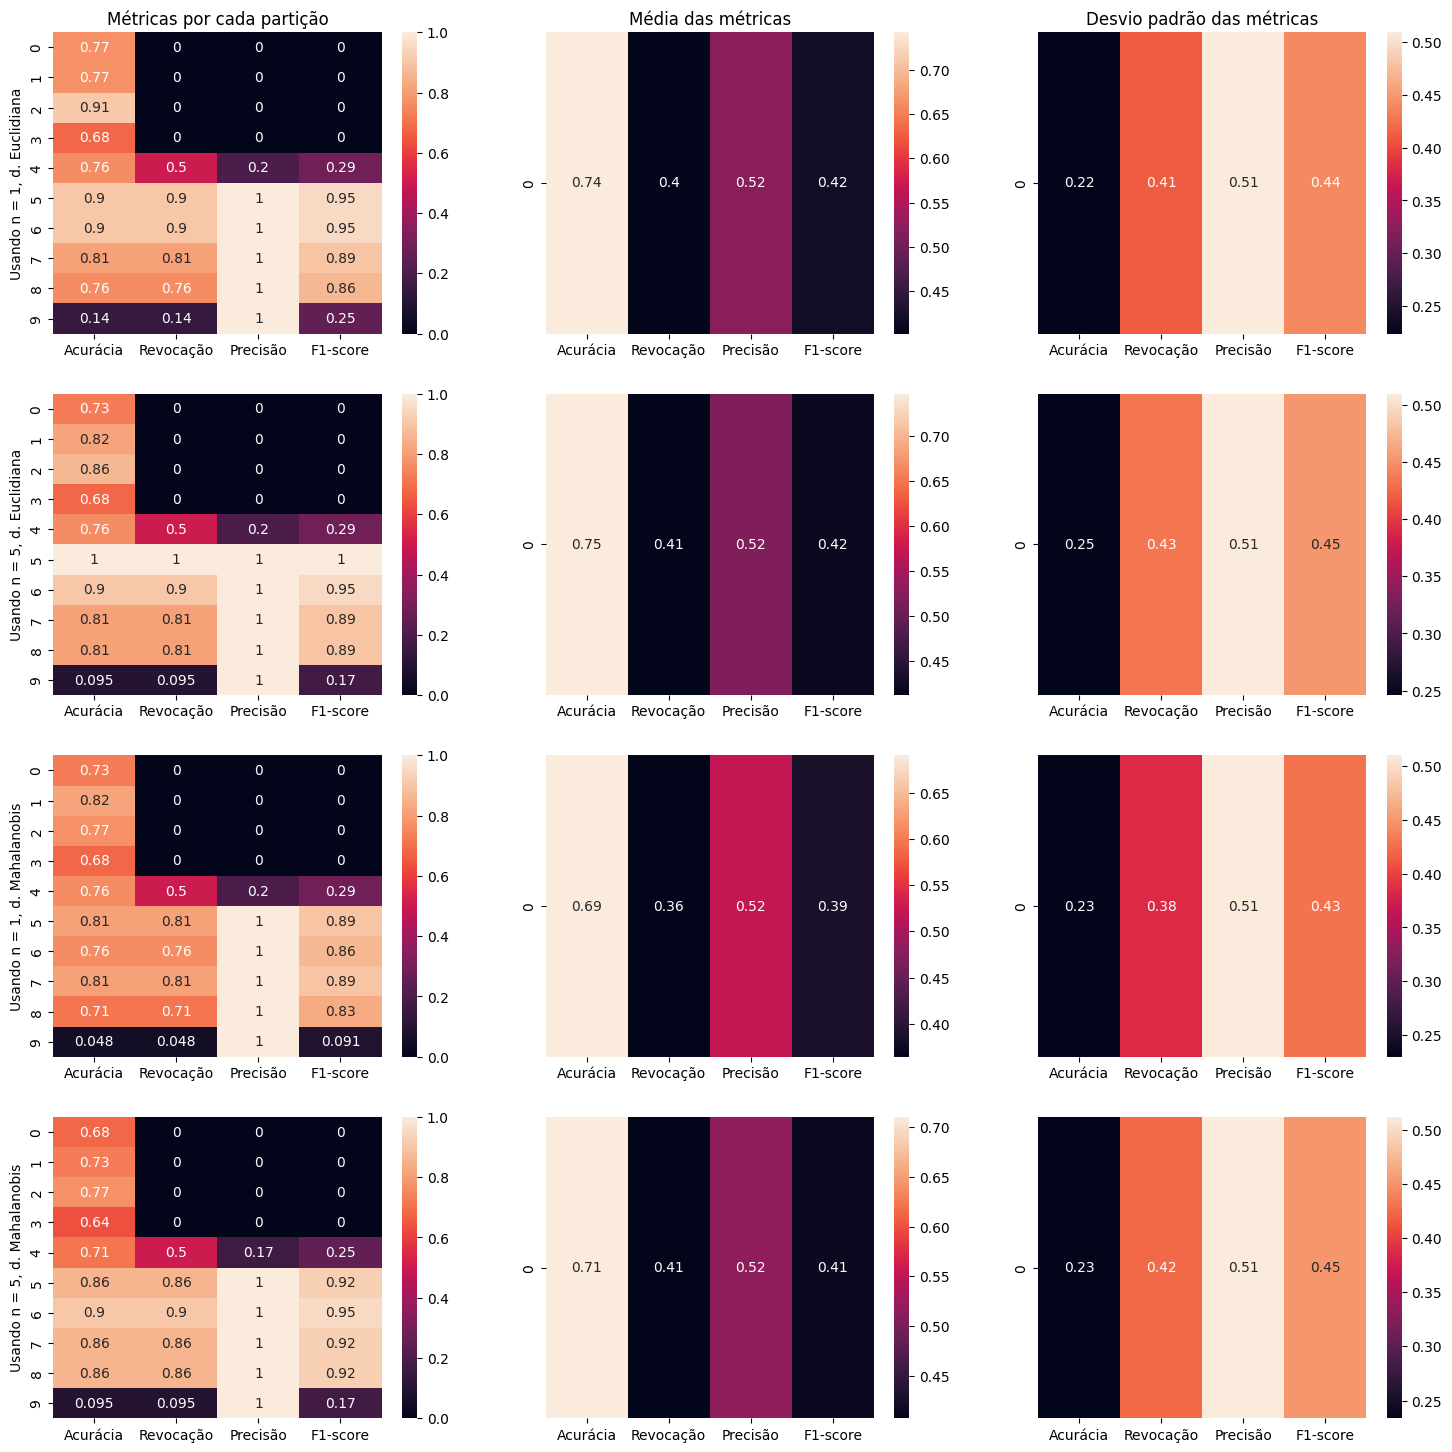

In [23]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 3, figsize=(18, 18))

x_labels = ['Acurácia', 'Revocação', 'Precisão', 'F1-score']

e1_fold = sns.heatmap(metrics[0], annot=True, xticklabels=x_labels, ax=ax1[0])
e1_mean = sns.heatmap([np.mean(metrics[0], axis=0)], annot=True, xticklabels=x_labels, ax=ax1[1])
e1_standard = sns.heatmap([np.std(metrics[0], axis=0, ddof=1)], annot=True, xticklabels=x_labels, ax=ax1[2])

e5_fold = sns.heatmap(metrics[1], annot=True, xticklabels=x_labels, ax=ax2[0])
e5_mean = sns.heatmap([np.mean(metrics[1], axis=0)], annot=True, xticklabels=x_labels, ax=ax2[1])
e5_standard = sns.heatmap([np.std(metrics[1], axis=0, ddof=1)], annot=True, xticklabels=x_labels, ax=ax2[2])

m1_fold = sns.heatmap(metrics[2], annot=True, xticklabels=x_labels, ax=ax3[0])
m1_mean = sns.heatmap([np.mean(metrics[2], axis=0)], annot=True, xticklabels=x_labels, ax=ax3[1])
m1_standard = sns.heatmap([np.std(metrics[2], axis=0, ddof=1)], annot=True, xticklabels=x_labels, ax=ax3[2])

m5_fold = sns.heatmap(metrics[3], annot=True, xticklabels=x_labels, ax=ax4[0])
m5_mean = sns.heatmap([np.mean(metrics[3], axis=0)], annot=True, xticklabels=x_labels, ax=ax4[1])
m5_standard = sns.heatmap([np.std(metrics[3], axis=0, ddof=1)], annot=True, xticklabels=x_labels, ax=ax4[2])

ax1[0].set_title('Métricas por cada partição')
ax1[1].set_title('Média das métricas')
ax1[2].set_title('Desvio padrão das métricas')

ax1[0].set_ylabel('Usando n = 1, d. Euclidiana')
ax2[0].set_ylabel('Usando n = 5, d. Euclidiana')
ax3[0].set_ylabel('Usando n = 1, d. Mahalanobis')
ax4[0].set_ylabel('Usando n = 5, d. Mahalanobis')

plt.show()

## Árvore de Decisão

### Treinando o modelo

In [4]:
folder = KFold(n_splits=10, shuffle=True)
gini_model = DecisionTreeClassifier(criterion='gini')
entropy_model = DecisionTreeClassifier(criterion='entropy')

metrics = np.zeros((2, 10, 4))

for i, (train_index, test_index) in enumerate(folder.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    gini_model.fit(X_train, y_train)
    entropy_model.fit(X_train, y_train)
    
    gini_pred = gini_model.predict(X_test)
    entropy_pred = entropy_model.predict(X_test)
    
    metrics[0][i] = np.array([accuracy_score(y_test, gini_pred),
                              recall_score(y_test, gini_pred, zero_division=0),
                              precision_score(y_test, gini_pred),
                              f1_score(y_test, gini_pred)])
    
    metrics[1][i] = np.array([accuracy_score(y_test, entropy_pred),
                              recall_score(y_test, entropy_pred, zero_division=0),
                              precision_score(y_test, entropy_pred),
                              f1_score(y_test, entropy_pred)])
    

### Plotando os resultados

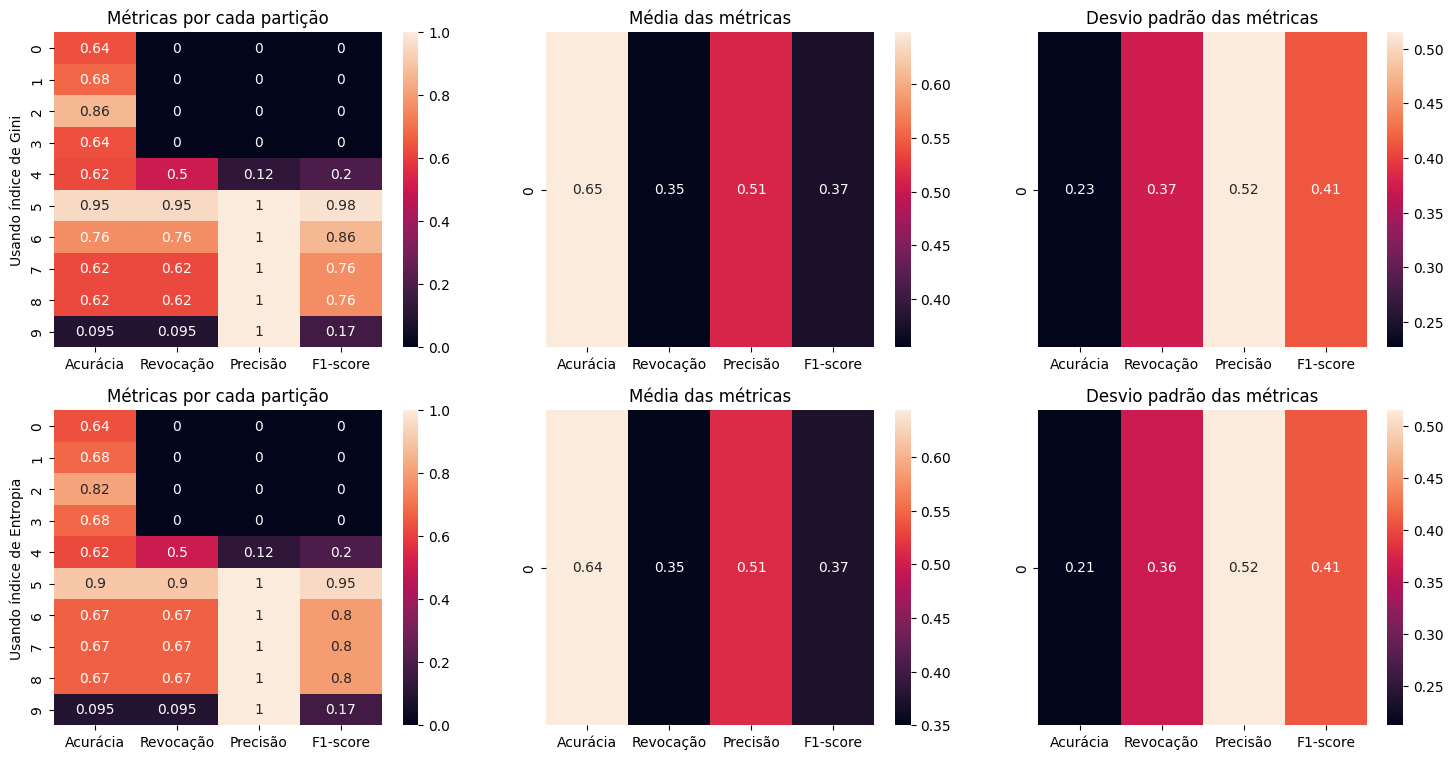

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(18, 9))

x_labels = ['Acurácia', 'Revocação', 'Precisão', 'F1-score']

gini_fold = sns.heatmap(metrics[0], annot=True, xticklabels=x_labels, ax=ax1[0])
gini_mean = sns.heatmap([np.mean(metrics[0], axis=0)], annot=True, xticklabels=x_labels, ax=ax1[1])
gini_standard = sns.heatmap([np.std(metrics[0], axis=0, ddof=1)], annot=True, xticklabels=x_labels, ax=ax1[2])

entropy_fold = sns.heatmap(metrics[1], annot=True, xticklabels=x_labels, ax=ax2[0])
entropy_mean = sns.heatmap([np.mean(metrics[1], axis=0)], annot=True, xticklabels=x_labels, ax=ax2[1])
entropy_standard = sns.heatmap([np.std(metrics[1], axis=0, ddof=1)], annot=True, xticklabels=x_labels, ax=ax2[2])

ax1[0].set_title('Métricas por cada partição')
ax1[1].set_title('Média das métricas')
ax1[2].set_title('Desvio padrão das métricas')
ax1[0].set_ylabel('Usando índice de Gini')

ax2[0].set_title('Métricas por cada partição')
ax2[1].set_title('Média das métricas')
ax2[2].set_title('Desvio padrão das métricas')
ax2[0].set_ylabel('Usando índice de Entropia')

plt.show()